# Assignment 2 by Yaxuan Song

The data I collect to excel is quaterly net sales from the webset of ULTA(http://ir.ultabeauty.com/financial-reports/quarterly-reports/default.aspx)

The data is starting from the first quarter of 2010 and will end at the second quarter of 2019, the aim of this project is to predict the revenue(net sales) in the third quarter in 2019.

In this project, I used two method for prediction: Decomposition of time series and ARIMA/SARIMA model.

In [1]:
#Step 1: Read data and observe time trends
import pandas as pd
import numpy as np
df=pd.read_csv('ULTA.csv',encoding='utf-8')
df=df.set_index('time')
df

,net sales
time,
1,320196
2,321804
3,339179
4,473659
5,386006
6,394567
7,413067
8,582511
9,474098


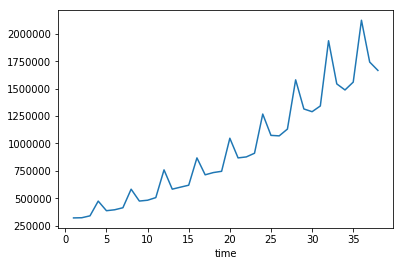

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
df['net sales'].plot()

In [3]:
# Step2: Deal with time series
# Method 1: Decomposition of time series(multiplicative model)
from statsmodels.tsa.seasonal import seasonal_decompose
series=df['net sales'].values
result = seasonal_decompose(series, model='multiplicative',freq=4)
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

[        nan         nan  371935.75   389257.375  407588.75   430431.25
  455049.25   476950.25   499411.375  533023.5    568640.75   597131.875
  626188.875  653987.375  684025.5    717062.5    749584.875  787897.375
  829636.25   866775.625  905243.25   953447.25  1006728.25  1056454.5
 1108048.    1174646.    1243822.875 1301548.125 1355496.625 1426495.875
 1499725.    1553119.375 1605144.    1655763.25  1704074.    1751292.5
         nan         nan]
[0.9561408  0.91426229 0.90530589 1.22429102 0.9561408  0.91426229
 0.90530589 1.22429102 0.9561408  0.91426229 0.90530589 1.22429102
 0.9561408  0.91426229 0.90530589 1.22429102 0.9561408  0.91426229
 0.90530589 1.22429102 0.9561408  0.91426229 0.90530589 1.22429102
 0.9561408  0.91426229 0.90530589 1.22429102 0.9561408  0.91426229
 0.90530589 1.22429102 0.9561408  0.91426229 0.90530589 1.22429102
 0.9561408  0.91426229]
[       nan        nan 1.00731589 0.99390363 0.99048982 1.00264261
 1.00269016 0.9975769  0.99285961 0.98842599 0.9

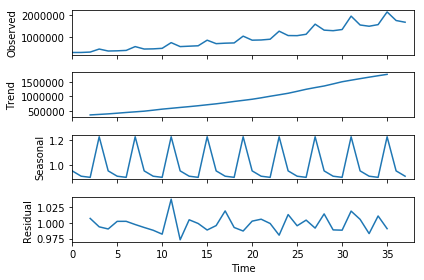

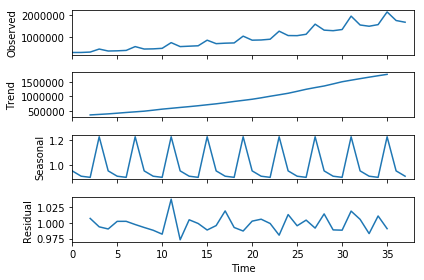

In [4]:
result.plot()

In [5]:
# Get deseasonalized date
deseason=series/result.seasonal
deseason

array([ 334883.73236897,  351982.14349831,  374656.79274675,
        386884.31971888,  403712.50732931,  431568.71391809,
        456273.40551603,  475794.55254469,  495845.38141845,
        526854.28032808,  558529.45106998,  619815.86490255,
        609441.62155738,  657358.40535916,  683504.88937294,
        709048.73343525,  746511.39193806,  803091.20182977,
        823723.79422278,  855712.39139256,  907943.68296797,
        959242.23398676, 1005958.33219174, 1035942.41485511,
       1122968.49924508, 1169483.87080505, 1249557.76440313,
       1290989.61674689, 1375193.90352652, 1410813.96042271,
       1482571.82415663, 1582623.7077998 , 1614476.6533461 ,
       1627783.42587165, 1723186.6298021 , 1735466.45214346,
       1822983.60112978, 1822898.11260671])

In [6]:
#Build Linear Regression of time idex and deseanalized date
import statsmodels.api as sm
model = sm.OLS(deseason, df.index.values).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     3840.
Date:                Tue, 24 Sep 2019   Prob (F-statistic):           5.51e-39
Time:                        16:32:36   Log-Likelihood:                -492.90
No. Observations:                  38   AIC:                             987.8
Df Residuals:                      37   BIC:                             989.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          4.736e+04    764.260     61.969      0.0

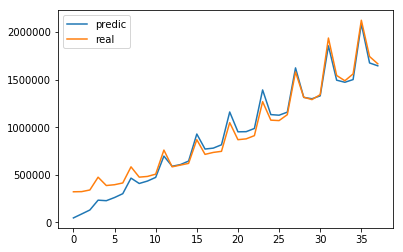

In [7]:
# Compare predictive data with real date and forcast the revenue in the third quarter in 2019
predict=df.index.values* 47360*result.seasonal
d={'predic':predict,'real':series}
prediction=pd.DataFrame(data=d)
prediction.plot()

In [8]:
new_pre=39* 47360*result.seasonal[2]
new_pre

1672136.1851391112

In [9]:
# Method 2: ARIMA/SARIMA Model

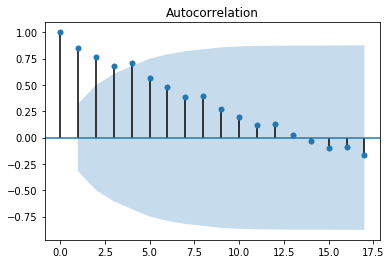

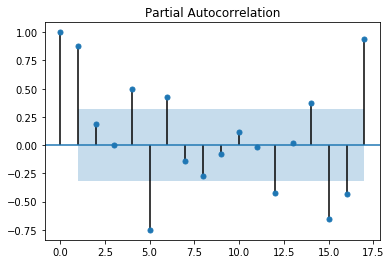

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller as ADF
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
import warnings
import math 

# Step 1: ADF examination
plot_acf(df['net sales'].values.squeeze(),lags=17)
plot_pacf(df['net sales'].values.squeeze(),lags=17)
plt.show()

From the ACF and PACF chart, we can see that correlations are tailing. But we are not sure the setting of p and q.

In [11]:
result = ADF(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.917945
p-value: 0.782006


The ADF test shows that the series of data is unstable.

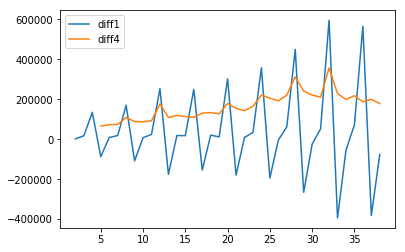

In [12]:
# Data is unstable, we try to do first order differencial
fig = plt.figure(figsize=(6,4))
ax= fig.add_subplot(111)
diff1 = df.diff(1)
ax.plot(diff1,label='diff1')
# We also try to do the fourth order differential
diff4 = df.diff(4)
ax.plot(diff4,label='diff4')
plt.legend()
plt.show()

Through comparison we can see that the fourth differential is much more stable than the first differential. 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


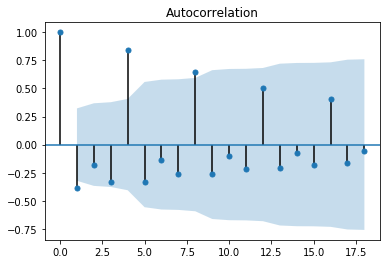

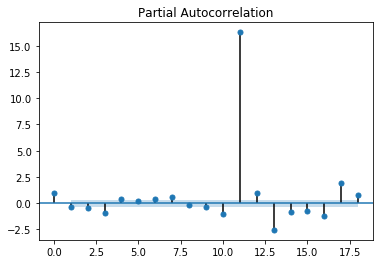

In [13]:
# ACF-PACF test for the after first differential and the fourth differential
plot_acf(diff1[1:].squeeze(),lags=18)
plot_pacf(diff1[1:].squeeze(),lags=18)
plt.show()

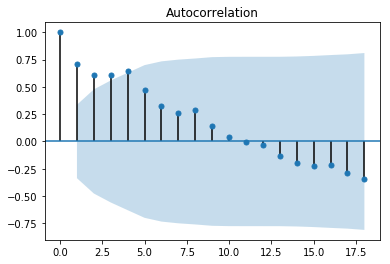

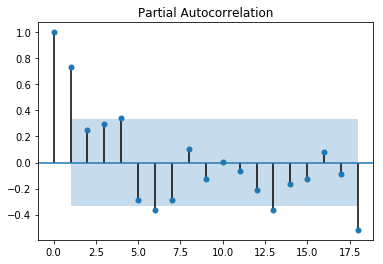

In [14]:
plot_acf(diff4[4:].squeeze(),lags=18)
plot_pacf(diff4[4:].squeeze(),lags=18)
plt.show()

From the ACF analysis of the first differential, it is obvious that the correlation is significant with the lag of 4, but it is unclear regards to PACF. 

However, in terms of the fourth differential, we can see from PACF that the correlation is significant with the lag of 2, and in ACF the correlation tails to zero.

So we can assume that the seasonal factor have a great impact to the revenue.

In this case, we should choose ARIMA or SARIMA model.

In [15]:
# Step 2: Choose model
# We firstly consider the best ARIMA model.
def evaluate_arima_model(X, arima_order):
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    error = mean_squared_error(test, predictions)  # calculate out of sample error
    return error

In [16]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [17]:
# evaluate parameters
p_values = [0, 1, 2, 3, 4, 5]
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(series, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=598500016328.731
ARIMA(0, 0, 1) MSE=314683644223.513
ARIMA(0, 0, 2) MSE=107533341988.629
ARIMA(0, 1, 0) MSE=98701559736.495
ARIMA(0, 1, 1) MSE=61195395958.672
ARIMA(0, 2, 0) MSE=270508184912.358
ARIMA(1, 0, 0) MSE=104038608643.922
ARIMA(1, 1, 0) MSE=91895387901.136
ARIMA(1, 2, 0) MSE=200404766525.199
ARIMA(2, 0, 0) MSE=93000536296.034
ARIMA(2, 1, 0) MSE=71532499193.983
ARIMA(2, 2, 0) MSE=193054302956.897
Best ARIMA(0, 1, 1) MSE=61195395958.672


We suppose that the best ARIMA model has the least Mean Squared Error.

Thus, the result comes out that the best setting of ARIMA model should be d=1,q=1

In [18]:
# Then we add seasonal factor and build SARIMA model.
# Based the above oservation, we set P=1,D=1,Q=1 and frequency is 4,because we the revenue is quarterly.
modd=sm.tsa.statespace.SARIMAX(series,order=(0,1,1),seasonal_order=(1,1,1,4),enforce_stationarity=False,enforce_invertibility=False)
resultt=modd.fit()
print(resultt.summary())

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                   38
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 4)   Log Likelihood                -323.819
Date:                           Tue, 24 Sep 2019   AIC                            655.639
Time:                                   16:32:51   BIC                            660.822
Sample:                                        0   HQIC                           657.180
                                            - 38                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5591      0.275     -2.030      0.042      -1.099      -0.019
ar.S.L4        0.9250      0.147      6.281

I also tried different combination of seasonal order, and choose the model with the smallest AIC.

AIC=655.639, BIC=660.822, skew=-0.38, Kurtosis =3.85, P-value of ma.L1, ar.S.L4, ma.S.L4 is less than 0.05

The model we choose reliable.

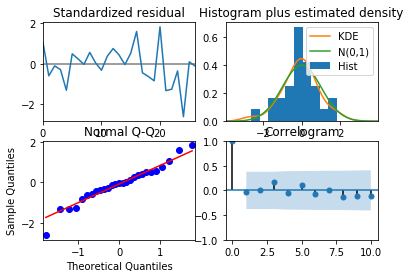

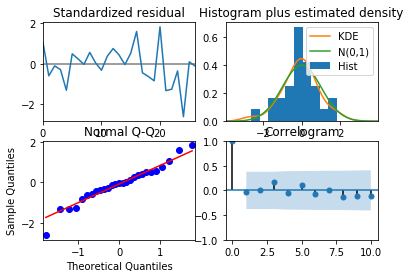

In [19]:
# Residuals test
resultt.plot_diagnostics()

From the above charts residuals is white noise process

In [20]:
#Forecast of the revenue in next quarter 
#We set the confidence level is 95%
forecast_v=resultt.get_forecast(steps=1)
fore=forecast_v.conf_int(alpha=0.05)
print(fore.round(2))

[[1666275.27 1832583.08]]


According to the two method above, we predict the revenue in next quarter will be around  1666275.27 and 1832583.08